In [51]:
from chatterino_logs import parse_from_dir

df = parse_from_dir('data')
df.head()

data/summit1g-2023-05-10.log: Failed to parse line: '[22:10:20]'
data/summit1g-2023-05-12.log: Failed to parse line: '[20:29:09]'
data/summit1g-2023-05-12.log: Failed to parse line: '[20:29:15]'


,ts,user,msg
0,2023-05-09 17:18:50,grrrwinkyfacelol,Gday!
1,2023-05-09 17:18:57,gangsta_spider,cowJAM
2,2023-05-09 17:18:57,erikatv,@funkz is it super easy to add this addons ?
3,2023-05-09 17:19:02,almondmilkwithice,Ew
4,2023-05-09 17:19:02,erikatv,curseforge?


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77140 entries, 0 to 77139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ts      77140 non-null  datetime64[ns]
 1   user    77140 non-null  object        
 2   msg     77140 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.8+ MB


In [71]:
df = df[df.user != 'fossabot']
df = df[df.user != 'xhipgamer']

In [72]:
from collections import Counter

tokens = []
for msg in df['msg']:
    msg_tokens = msg.split()
    for token in msg_tokens:
        tokens.append(token)

token_counter = Counter(tokens)
token_counter.most_common(25)

[('the', 6792),
 ('a', 5149),
 ('you', 4852),
 ('is', 4785),
 ('to', 4744),
 ('KEKW', 2994),
 ('it', 2842),
 ('and', 2720),
 ('in', 2693),
 ('for', 2389),
 ('i', 2333),
 ('that', 2326),
 ('on', 2129),
 ('I', 2128),
 ('he', 1993),
 ('this', 1909),
 ('of', 1906),
 ('LUL', 1864),
 ('@summit1g', 1747),
 ('just', 1726),
 ('zooted', 1587),
 ('o7', 1528),
 ('lol', 1467),
 ('are', 1460),
 ('like', 1365)]

In [73]:
unique_tokens = set(tokens)
len(unique_tokens)

34766

In [78]:
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

common_words = {
    'the', 'a', 'is', 'to', 'you', 'on', 'and', 'in', 'for',
    'it', 'i', 'I', 'that', 'this', 'of', 'he', 'her', 'with',
    'just', 'are', 'some', 'at', 'out', 'was', 'not', 'so', 'my',
    'stayed', 'your', 'get', 'what', 'have', 'be', 'do', 'its',
    'up', 'can', 'or', 'got', 'they', 'all', 'u', 'but', 'back',
    'go', 'chat', 'we', 'if', 'time', 'his', 'me', 'over', 'has',
    'how', 'when', 'one', 'did', 'still', 'team', 'them', 'here',
    'any', 'bro', "don't", 'dont', 'off', 'as', 'classic', 'game',
    'why', 'from', 'more', 'too'
}

twitch_emotes = {
    'sum1g': 1.7,
    'KEKW': 2.0,
    'LUL': 2.7,
    '1G': 1.7,
    'sumLove': 1.9,
    'o7': 2.1,
    'sumBuhblam': 1.3,
    'sum': 2.2,
    'zooted': 1.0,
    'EZ': 1.3,
    'Pog': 3.1,
    'OMEGALUL': 2.0,
    'KEK': 2.0,
    'PepeLaugh': 2.0,
    'HUH': 0.3,
    'peepoHey': 1.8,
    'Jigglin': 1.0,
    'sumPls': 1.3,
    'Sadge': -2.1,
    'sumMolly': 1.0,
    'KEKL': 2.0,
    'LOL': 2.0,
    'LETSGO': 1.0,
    'LULW': 2.0,
    'Kappa': 0.5
}

for key, value in twitch_emotes.items():
    analyzer.lexicon[key] = value

tokens_not_in_lexicon = []

for token in unique_tokens:
    if not token.lower() in common_words and not token in analyzer.lexicon:
        tokens_not_in_lexicon.append(token)

tokens_not_in_lexicon_frequency = []
total_tokens = token_counter.total()

for token in tokens_not_in_lexicon:
    tokens_not_in_lexicon_frequency.append(
        (token, token_counter[token], token_counter[token] / total_tokens))
    
tokens_not_in_lexicon_frequency.sort(key=lambda a: a[1], reverse=True)

token_df = pd.DataFrame(tokens_not_in_lexicon_frequency, columns=["token", "count", "percent"])
token_df.head(25)

,token,count,percent
0,@summit1g,1747,0.005247
1,summit,733,0.002201
2,SPEED,533,0.001601
3,about,532,0.001598
4,Judd,527,0.001583
5,there,525,0.001577
6,him,499,0.001499
7,now,499,0.001499
8,judd,498,0.001496
9,?,488,0.001466


In [75]:
token_df['count'].describe()

count    33121.000000
mean         5.637481
std         25.051178
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1747.000000
Name: count, dtype: float64

In [79]:
token_df.loc[token_df['percent'] >= 0.001]

,token,count,percent
0,@summit1g,1747,0.005247
1,summit,733,0.002201
2,SPEED,533,0.001601
3,about,532,0.001598
4,Judd,527,0.001583
5,there,525,0.001577
6,him,499,0.001499
7,now,499,0.001499
8,judd,498,0.001496
9,?,488,0.001466


In [81]:
def get_vader_compound(msg: str) -> float:
    results = analyzer.polarity_scores(msg)
    return results['compound']

df['vader_compound'] = df.apply(lambda row: get_vader_compound(row.msg), axis=1)
df.head()

,ts,user,msg,vader_compound
0,2023-05-09 17:18:50,grrrwinkyfacelol,Gday!,0.0000
1,2023-05-09 17:18:57,gangsta_spider,cowJAM,0.0000
2,2023-05-09 17:18:57,erikatv,@funkz is it super easy to add this addons ?,0.7783
3,2023-05-09 17:19:02,almondmilkwithice,Ew,0.0000
4,2023-05-09 17:19:02,erikatv,curseforge?,0.0000


<Axes: ylabel='Density'>

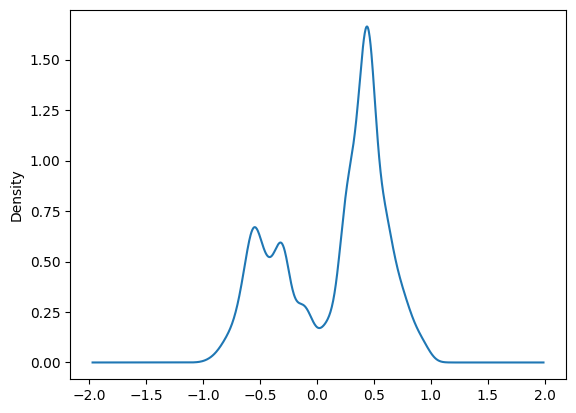

In [92]:
# the vast majority of messages are 0.0, let's look at the ones we
# have some read on
df[df['vader_compound'] != 0.0].vader_compound.plot.kde()